##### 1. 数据归一化：意义

min-max归一化

In [1]:
import numpy as np
from data_utils import load_CIFAR10
from softmax_without_regression import Softmax
import matplotlib.pyplot as plt

In [2]:
def min_max_scaler(X):
    min1 = 0
    max1 = 255
    return (X-min1)/(max1-min1)

In [3]:
def pre_dataset():
    cifar10_dir = 'D:/dataset/cifar-10-python/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    num_train = 48000
    num_val = 2000

    mask = range(num_train, num_train + num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    X_train = X_train[:num_train]
    y_train = y_train[:num_train]

    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))

    X_train = min_max_scaler(X_train)
    X_val = min_max_scaler(X_val)
    X_test = min_max_scaler(X_test)

    # add a parameter for W
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

    return X_train, y_train, X_test, y_test, X_val, y_val

In [8]:
def get_softmax_model(X, y,learning_rate,batch_num,num_iter):
    softmax = Softmax()
    loss_history = softmax.train(X, y, learning_rate,batch_num,num_iter)
    VisualizeLoss(loss_history,num_iter)
    return softmax

def VisualizeLoss(loss_history,num_iter):
    plt.plot(loss_history)
    plt.title('epoch: %d'%num_iter )
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()

##### batch_num探究：learning_rate=0.01;num_iter=2000; 变化batch_num

In [5]:
X_train, y_train, X_test, y_test, X_val, y_val = pre_dataset()

D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_1
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_2
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_3
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_4
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_5
D:/dataset/cifar-10-python/cifar-10-batches-py\test_batch


Iteration 0 / 100, learning rate 0.020000 : loss 2.305581


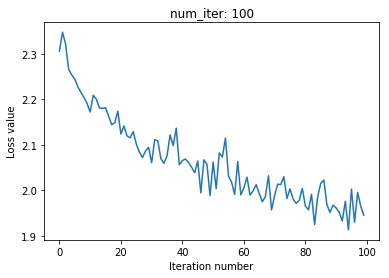

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.334400
Iteration 0 / 200, learning rate 0.020000 : loss 2.304549


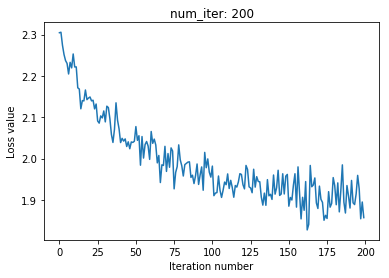

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.331700
Iteration 0 / 500, learning rate 0.020000 : loss 2.303265


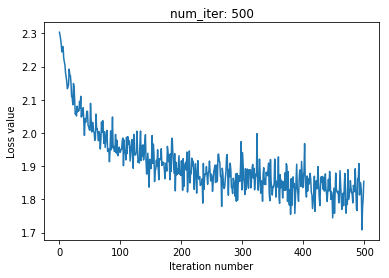

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.333600
Iteration 0 / 1000, learning rate 0.020000 : loss 2.303793
Iteration 500 / 1000, learning rate 0.020000 : loss 1.899061


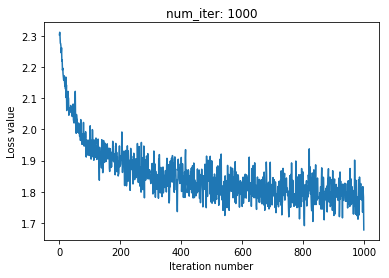

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.384200
Iteration 0 / 1500, learning rate 0.020000 : loss 2.301336
Iteration 500 / 1500, learning rate 0.020000 : loss 1.830695
Iteration 1000 / 1500, learning rate 0.020000 : loss 1.802166


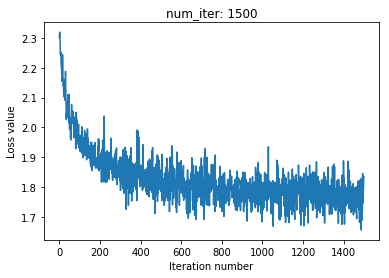

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.362200
Iteration 0 / 2000, learning rate 0.020000 : loss 2.298813
Iteration 500 / 2000, learning rate 0.020000 : loss 1.849066
Iteration 1000 / 2000, learning rate 0.020000 : loss 1.821993
Iteration 1500 / 2000, learning rate 0.020000 : loss 1.763089


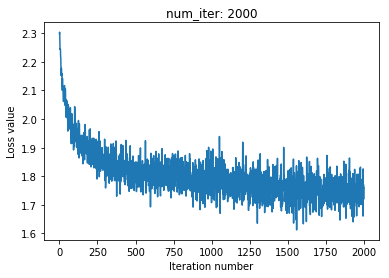

learning_rate: 0.020000;batch_num: 500; Accuracy: 0.381500


In [6]:
batch_nums = [500]
learning_rate = 0.01
num_iters = [100,200,500,1000,1500,2000]
for num_iter in num_iters:
    for batch_num in batch_nums:
        softmax = get_softmax_model(X_train, y_train,learning_rate,batch_num,num_iter)
        y_pred = softmax.predict(X_test)
        acc = np.mean(y_pred == y_test)
        print('learning_rate: %f;batch_num: %d; Accuracy: %f' % (learning_rate,batch_num,acc))

Iteration 0 / 100, learning rate 0.001000 : loss 2.302417


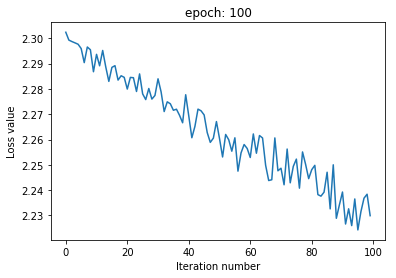

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.213500
Iteration 0 / 200, learning rate 0.001000 : loss 2.302583


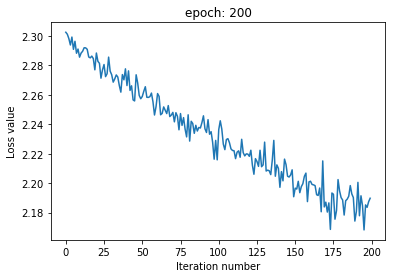

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.264700
Iteration 0 / 500, learning rate 0.001000 : loss 2.302960


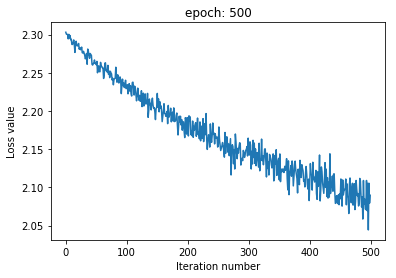

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.300100
Iteration 0 / 1000, learning rate 0.001000 : loss 2.301088
Iteration 500 / 1000, learning rate 0.001000 : loss 2.053853


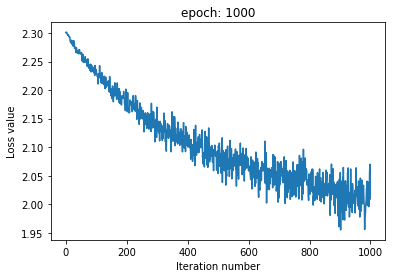

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.321400
Iteration 0 / 1500, learning rate 0.001000 : loss 2.304264
Iteration 500 / 1500, learning rate 0.001000 : loss 2.113725
Iteration 1000 / 1500, learning rate 0.001000 : loss 1.996045


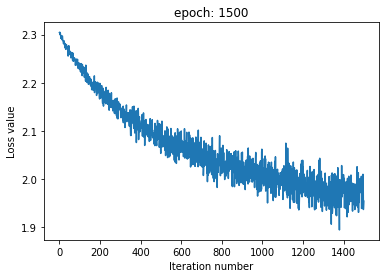

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.336100
Iteration 0 / 2000, learning rate 0.001000 : loss 2.301973
Iteration 500 / 2000, learning rate 0.001000 : loss 2.061886
Iteration 1000 / 2000, learning rate 0.001000 : loss 2.016024
Iteration 1500 / 2000, learning rate 0.001000 : loss 1.959996


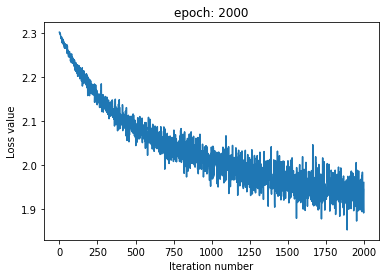

learning_rate: 0.001000;batch_num: 500; Accuracy: 0.342200


In [9]:
batch_nums = [500]
learning_rate = 0.001
num_iters = [100,200,500,1000,1500,2000]
for num_iter in num_iters:
    for batch_num in batch_nums:
        softmax = get_softmax_model(X_train, y_train,learning_rate,batch_num,num_iter)
        y_pred = softmax.predict(X_test)
        acc = np.mean(y_pred == y_test)
        print('learning_rate: %f;batch_num: %d; Accuracy: %f' % (learning_rate,batch_num,acc))